In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
## Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

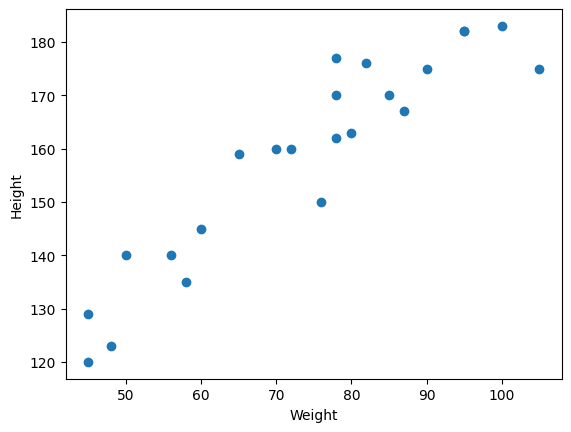

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [4]:
## Divide our dataset into independent and dependent features
X=df[['Weight']] ##independent features
y=df['Height'] ##dependent features

In [5]:
## Train test split
from sklearn.model_selection import train_test_split 

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [7]:
X.shape

(23, 1)

In [8]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((18, 1), (18,), (5, 1), (5,))

In [9]:
## Standardization of trained independent data
from sklearn.preprocessing import StandardScaler

In [10]:
scalar=StandardScaler()

In [11]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

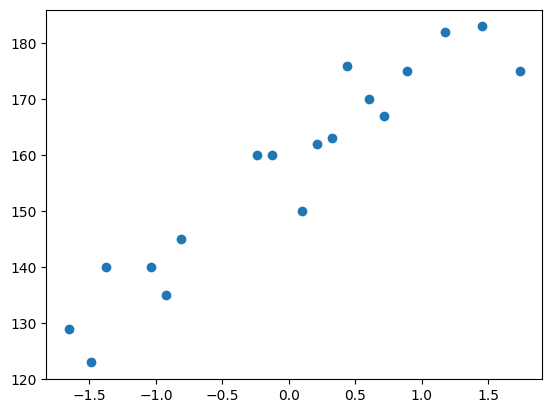

In [12]:
plt.scatter(X_train,y_train)

In [13]:
## Train with simple Linear Regression Model
from sklearn.linear_model import LinearRegression


In [14]:
regresssor=LinearRegression()

In [15]:
regresssor.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
print("The slope or coefficient of weight is",regresssor.coef_)
print("Intercept:",regresssor.intercept_)

The slope or coefficient of weight is [17.03440872]
Intercept: 157.5


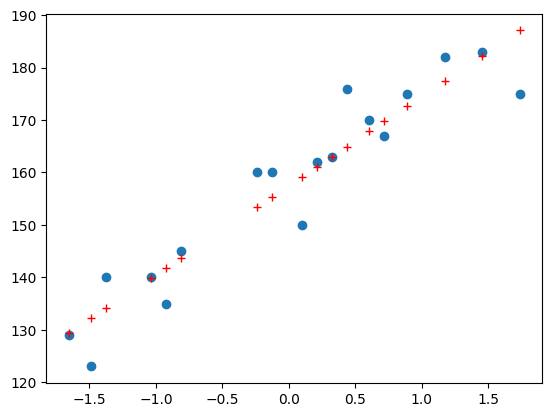

In [17]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regresssor.predict(X_train),'r+')

In [18]:
'''Predication of train data
 1.predicted height output=intercept + coef_(Weights)
 2.y_pred_train=157.5 + 17.03440872(X_train)

 Predication of test data
 1.predicted height output=intercept + coef_(Weights)
 2.y_pred_test=157.5 + 17.03440872(X_test)'''

'Predication of train data\n 1.predicted height output=intercept + coef_(Weights)\n 2.y_pred_train=157.5 + 17.03440872(X_train)\n\n Predication of test data\n 1.predicted height output=intercept + coef_(Weights)\n 2.y_pred_test=157.5 + 17.03440872(X_test)'

In [19]:
y_pred_test=regresssor.predict(X_test)

In [20]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

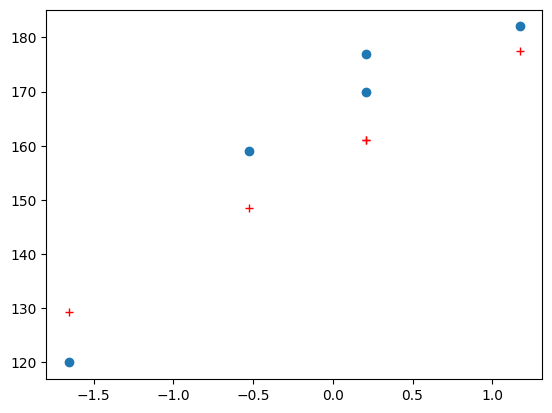

In [21]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,'r+')

## Peformance metrics 
## MSE, MAE, RMSE
## R Square and adjusted R square

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [24]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

In [25]:
## Adjusted r2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [26]:
regresssor

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [30]:
#the new data point weight is 80
scaled_weight=scalar.transform([[80]])
scaled_weight[0]

c:\Users\bensd\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.32350772])

In [31]:
print("The height prediction for weight 80kg is:",regresssor.predict([scaled_weight[0]]))

The height prediction for weight 80kg is: [163.01076266]


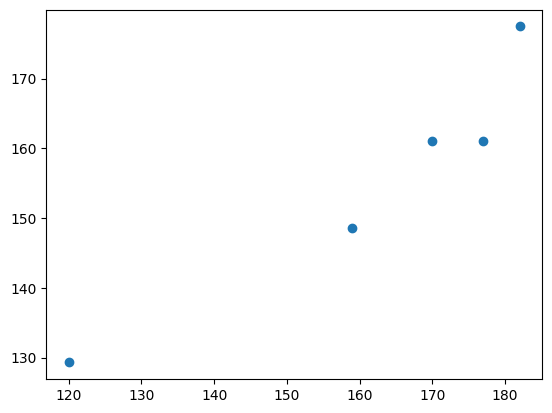

In [32]:
## assumptions
## plot a scatter plot for prediction
plt.scatter(y_test,y_pred_test)

In [33]:
## Residuals 
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

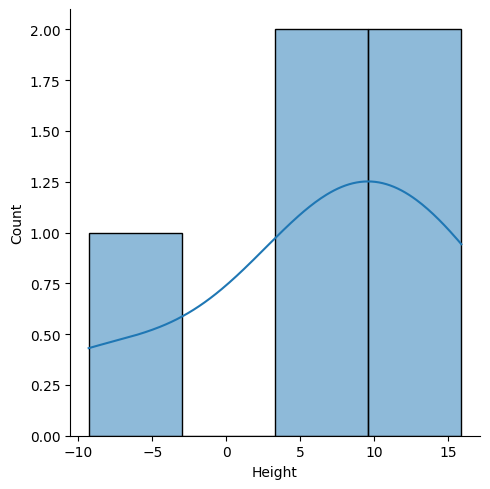

In [34]:
#plot residuals
import seaborn as sns
sns.displot(residuals,kde=True)

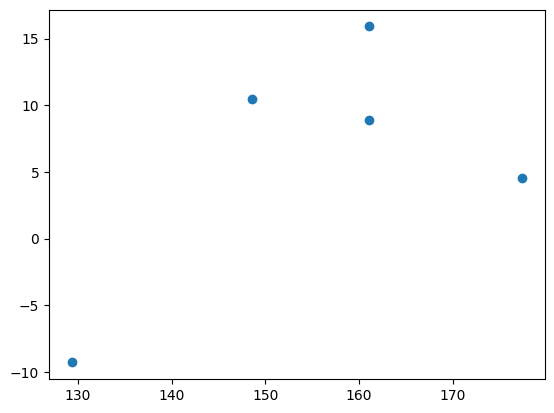

In [35]:
plt.scatter(y_pred_test,residuals)